In [1]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [2]:
df = pd.read_csv('./Datasets/df.csv')

In [3]:
df.fillna('[removed]', inplace = True)

In [4]:
X_st = df['selftext']
X_ti = df['title']
y = df['subreddit']

# `selftext`

In [5]:
custom_stop = list(ENGLISH_STOP_WORDS)

cv = CountVectorizer(stop_words=custom_stop, min_df=6)

df_features = pd.DataFrame(cv.fit_transform(df['selftext']).todense(),
                           columns = cv.get_feature_names())
df_features.head()

,00,000,001,01,015,02,03,04,05,06,...,zacks,zero,zerohedge,zesty,zoltan,zombie,zone,zones,zoom,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
wsb = df_features.loc[df['subreddit'] == 0].copy()
inv = df_features.loc[df['subreddit'] == 1].copy()

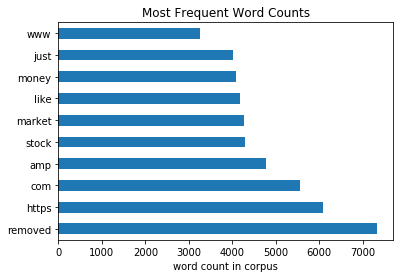

In [7]:
df_features.sum().sort_values(ascending = False).head(10).plot.barh()
plt.xlabel('word count in corpus')
plt.title('Most Frequent Word Counts');

In [8]:
freq_words = df_features.sum().sort_values(ascending = False).head(20).index

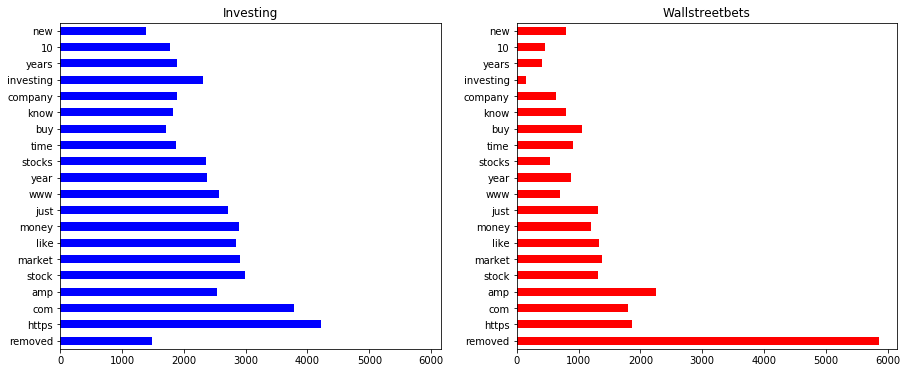

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6), sharex = 'row')

inv[freq_words].sum().plot.barh(ax=ax1, title='Investing', color = 'blue') 
wsb[freq_words].sum().plot.barh(ax=ax2, title='Wallstreetbets', color = 'red');

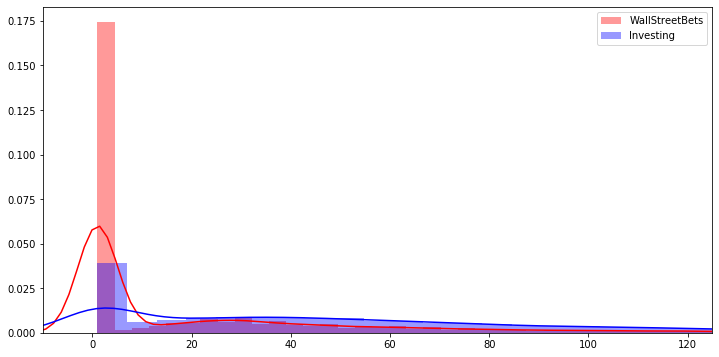

In [10]:
w_words = [len(sen.split(' ')) for sen in df.loc[wsb.index, 'selftext']]
wsb_length = [len(sen) for sen in df.loc[wsb.index,'selftext']]
def get_lengths(df_in):
    words = [len(sen.split(' ')) for sen in df.loc[df_in.index, 'selftext']\
            if len(sen.split(' ')) < 175]
    length = [len(sen) for sen in df.loc[df_in.index,'selftext']\
             if len(sen) < 700]
    return words, length
w_words, shelley_length = get_lengths(wsb)
i_words, p_length = get_lengths(inv)
fig, ax = plt.subplots(figsize= (12,6))
sns.distplot(w_words, label = 'WallStreetBets', ax=ax, color='Red')
sns.distplot(i_words, label = 'Investing', ax=ax, color='Blue')
ax.legend()
ax.set_xbound(-10,125);

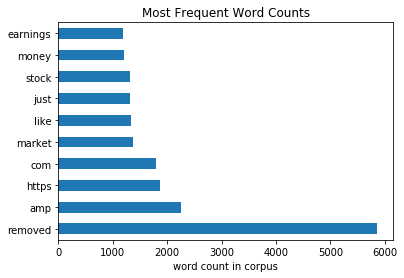

In [11]:
wsb.sum().sort_values(ascending = False).head(10).plot.barh()
plt.xlabel('word count in corpus')
plt.title('Most Frequent Word Counts');

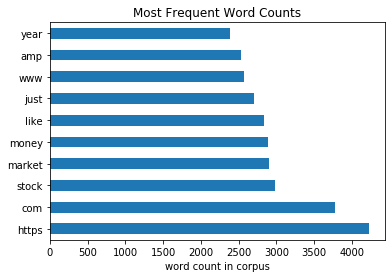

In [12]:
inv.sum().sort_values(ascending = False).head(10).plot.barh()
plt.xlabel('word count in corpus')
plt.title('Most Frequent Word Counts');

# `title`

In [13]:
custom_stop = list(ENGLISH_STOP_WORDS)

cv = CountVectorizer(stop_words=custom_stop, min_df=6)

df_features = pd.DataFrame(cv.fit_transform(df['title']).todense(),
                           columns = cv.get_feature_names())
df_features.head()

,00,000,01,02,03,04,050,06,07,08,...,youtube,youtuber,yr,ytd,zee,zero,आज,खन,पर,यर
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
wsb = df_features.loc[df['subreddit'] == 0].copy()
inv = df_features.loc[df['subreddit'] == 1].copy()

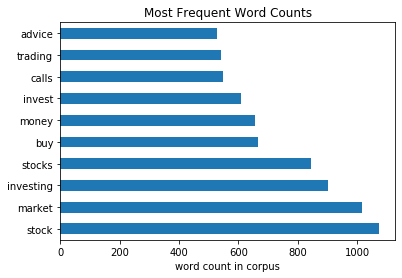

In [15]:
df_features.sum().sort_values(ascending = False).head(10).plot.barh()
plt.xlabel('word count in corpus')
plt.title('Most Frequent Word Counts');

In [16]:
freq_words = df_features.sum().sort_values(ascending = False).head(20).index

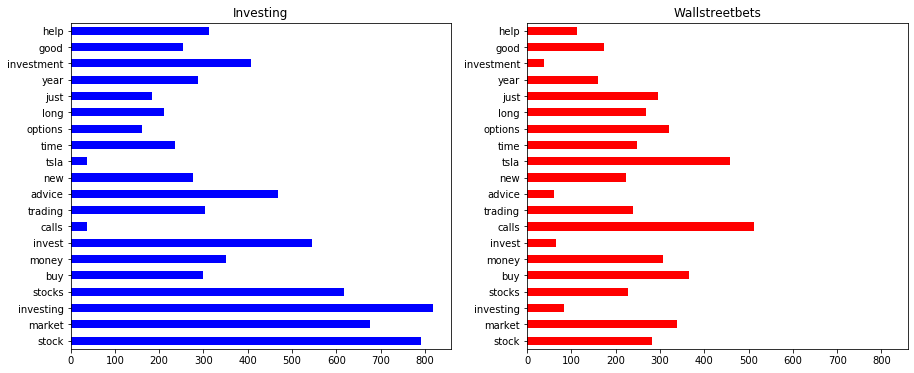

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6), sharex = 'row')

inv[freq_words].sum().plot.barh(ax=ax1, title='Investing', color = 'blue') 
wsb[freq_words].sum().plot.barh(ax=ax2, title='Wallstreetbets', color = 'red');

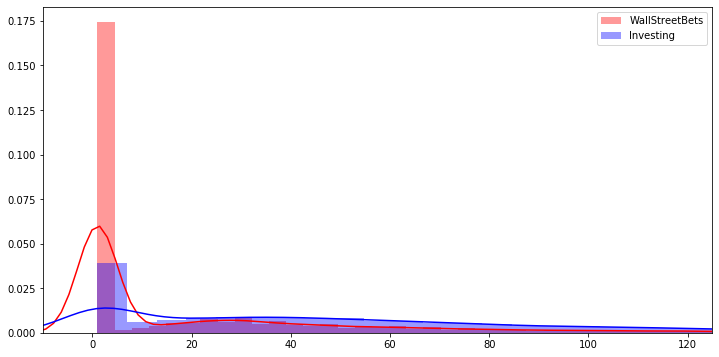

In [18]:
w_words = [len(sen.split(' ')) for sen in df.loc[wsb.index, 'selftext']]
wsb_length = [len(sen) for sen in df.loc[wsb.index,'selftext']]
def get_lengths(df_in):
    words = [len(sen.split(' ')) for sen in df.loc[df_in.index, 'selftext']\
            if len(sen.split(' ')) < 175]
    length = [len(sen) for sen in df.loc[df_in.index,'selftext']\
             if len(sen) < 700]
    return words, length
w_words, shelley_length = get_lengths(wsb)
i_words, p_length = get_lengths(inv)
fig, ax = plt.subplots(figsize= (12,6))
sns.distplot(w_words, label = 'WallStreetBets', ax=ax, color='Red')
sns.distplot(i_words, label = 'Investing', ax=ax, color='Blue')
ax.legend()
ax.set_xbound(-10,125);

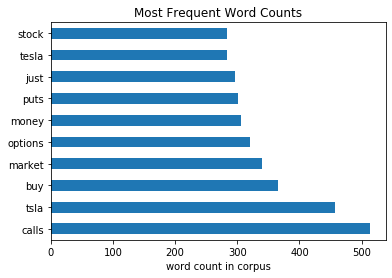

In [19]:
wsb.sum().sort_values(ascending = False).head(10).plot.barh()
plt.xlabel('word count in corpus')
plt.title('Most Frequent Word Counts');

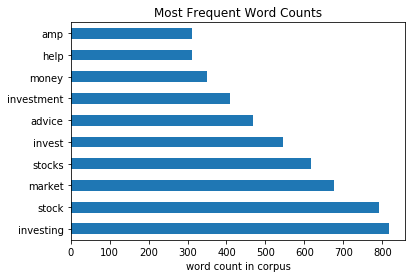

In [20]:
inv.sum().sort_values(ascending = False).head(10).plot.barh()
plt.xlabel('word count in corpus')
plt.title('Most Frequent Word Counts');

# Sentimental Anaylsis with Vader

In [21]:
df_sent_sf = pd.read_csv('selftext_scores.csv')
df_sent_ti = pd.read_csv('title_scores.csv')
df_sent_ti_st = pd.read_csv('title_and_selftext.csv')

In [22]:
df_sent_sf['subreddit'] = df_sent_sf['subreddit'].map({0: 'wallstreetbets', 1: 'investing'})

In [23]:
df_sent_ti['subreddit'] = df_sent_ti['subreddit'].map({0: 'wallstreetbets', 1: 'investing'})

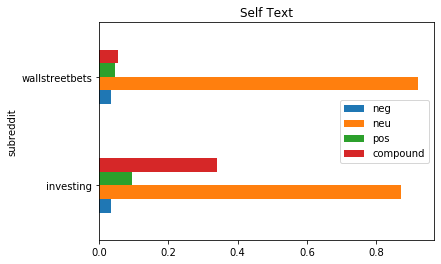

In [24]:
df_sent_sf.groupby('subreddit').mean().plot.barh()
plt.title('Self Text');

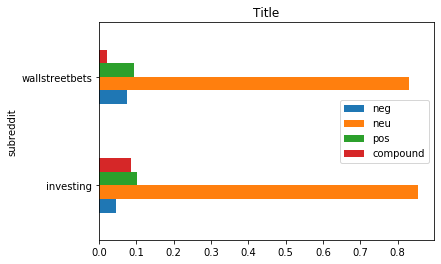

In [25]:
df_sent_ti.groupby('subreddit').mean().plot.barh()
plt.title('Title');

In [26]:
df_sent_ti_st.drop(columns = 'Unnamed: 0', inplace = True)

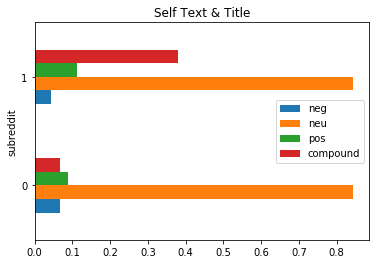

In [27]:
df_sent_ti_st.groupby('subreddit').mean().plot.barh()
plt.title('Self Text & Title');